In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Mumbai_House_Price.csv');
df

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New
...,...,...,...,...,...,...,...,...,...
76033,3,Apartment,Parinee Liva Roca,1527,7.00,Cr,Juhu,Ready to move,Unknown
76034,5,Apartment,Parinee Liva Roca,3049,12.00,Cr,Juhu,Ready to move,Unknown
76035,4,Apartment,Lodha Seaview,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown
76036,2,Apartment,Hubtown Serene,1305,4.25,Cr,Bandra East,Ready to move,Unknown


In [286]:
print(f"Before deleting NULL value in columns \"age\": {df.shape}")
df = df.replace('Unknown', np.nan)
df.dropna(inplace=True)
print(f"After deleting NULL value in columns \"age\": {df.shape}")

Before deleting NULL value in columns "age": (76038, 9)
After deleting NULL value in columns "age": (61429, 9)


In [287]:
print(f"Before deleting duplicated row: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"After deleting duplicated row: {df.shape}")

Before deleting duplicated row: (61429, 9)
After deleting duplicated row: (47191, 9)


In [288]:
stats =  df['region'].value_counts(ascending=False)
print(stats)
max = df['region'].value_counts().max()
print(max)
tmp = stats.to_list()/max
stats_to_change = stats[stats<=11]
stats_to_change
def convert(region):
    if region in stats_to_change:
        return 'Others'
    return region
df1 = df.copy()
df1.region = df1.region.apply(convert)
df1.region.unique()
df1['region'].value_counts(ascending=False)
df1 = df1.replace('Others', np.nan)
df1.dropna(inplace=True)
df1.shape
df1

region
Mira Road East    7642
Thane West        5720
Dombivali         1957
Kandivali East    1616
Kharghar          1574
                  ... 
Tilak Nagar          1
Ashok nagar          1
Antop Hill           1
Peddar Road          1
L I C Colony         1
Name: count, Length: 205, dtype: int64
7642


,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New
...,...,...,...,...,...,...,...,...,...
76011,2,Apartment,Arkade Earth Fern,707,1.98,Cr,Kanjurmarg,Under Construction,New
76012,2,Apartment,Arkade Earth Fern,677,1.88,Cr,Kanjurmarg,Under Construction,New
76013,2,Apartment,Arkade Earth Fern,681,1.89,Cr,Kanjurmarg,Under Construction,New
76025,2,Apartment,NARANG REALTY And WADHWA GROUP Courtyard,762,1.77,Cr,Thane West,Ready to move,New


C:\Users\phand\AppData\Local\Temp\ipykernel_11456\689159247.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['area'])


<Axes: xlabel='area', ylabel='Density'>

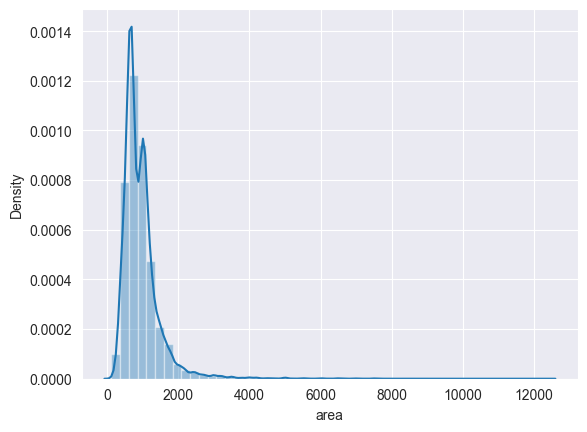

In [289]:
sns.distplot(df1['area'])

In [290]:
#IQR for price_per_sqft
q1 = df1['area'].quantile(0.25)
q3 = df1['area'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

upperlimit = q3+(1.5*iqr)
lowerlimit = q1-(1.5)*iqr
lowerlimit, upperlimit

df2 = df1.loc[(df['area']<upperlimit)&(df['area']>lowerlimit)] 
df2.shape

(44594, 9)

C:\Users\phand\AppData\Local\Temp\ipykernel_11456\1905216595.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['area'])


<Axes: xlabel='area', ylabel='Density'>

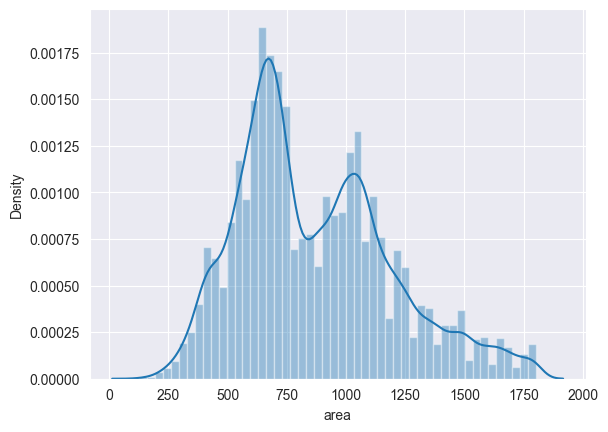

In [291]:
sns.distplot(df2['area'])

In [292]:
df2 = pd.get_dummies(df1, columns=['type', 'price_unit', 'region', 'status', 'age'], dtype = float)
df2.drop(columns=['locality'], inplace=True)
df2

,bhk,area,price,type_Apartment,type_Independent House,type_Studio Apartment,type_Villa,price_unit_Cr,price_unit_L,region_Agripada,...,region_Vikhroli,region_Ville Parle East,region_Ville Parle West,region_Virar,region_Wadala,region_Worli,status_Ready to move,status_Under Construction,age_New,age_Resale
0,3,685,2.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,640,52.51,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2,610,1.73,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2,876,59.98,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2,659,94.11,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76011,2,707,1.98,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
76012,2,677,1.88,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
76013,2,681,1.89,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
76025,2,762,1.77,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [293]:
y = df2['price'].to_numpy()
x = df2.drop(['price'], axis=1).to_numpy()

print(x.shape)
print(y.shape)

(46908, 118)
(46908,)


In [294]:
import tensorflow as tf
import keras
from keras import layers, optimizers

In [295]:
def custom_dense(unit=128, activation='relu', bias=True):
    def _custom_dense(input):
        x = layers.Dense(unit, activation, bias)(input)
        return x
    return _custom_dense

def ANN(att_dims):
    input = keras.Input(shape=(att_dims,), name='ANN_input')

    # Normalize input data (assuming numerical features)
    x = layers.Normalization()(input)
    # Use ReLU activation in hidden layers for non-linearity
    #x = custom_dense(256, activation='relu')(x)
    x = custom_dense(128, activation='relu')(x)
    x = custom_dense(64, activation='relu')(x)
    x = custom_dense(32, activation='relu')(x)

    # Dropout for regularization
    x = layers.Dropout(0.3)(x)

    # Use linear activation for output layer (predicting house prices)
    output = custom_dense(1, activation='linear')(x)
    
    model = keras.Model(input, output, name='ANN')
    model.summary()
    return model


In [296]:
dim = x.shape[1]
model = ANN(dim)
# Compile model
model.compile(
        loss=keras.losses.MeanAbsoluteError(),
        optimizer=keras.optimizers.Adam(0.001),
        metrics=[keras.metrics.R2Score()],
)

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ANN_input (InputLayer)      [(None, 118)]             0         
                                                                 
 normalization_18 (Normaliz  (None, 118)               237       
 ation)                                                          
                                                                 
 dense_76 (Dense)            (None, 128)               15232     
                                                                 
 dense_77 (Dense)            (None, 64)                8256      
                                                                 
 dense_78 (Dense)            (None, 32)                2080      
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                               

In [297]:
train_size = int(x.shape[0] * 0.8)

train_data = x[:train_size]
train_label = y[:train_size]
test_data = x[train_size:]
test_label = y[train_size:]

print(train_data.shape)
print(test_data.shape)

(37526, 118)
(9382, 118)


In [298]:
EPOCHS = 100
BATCH_SIZE = 256
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
# Train model 
history = model.fit(train_data, train_label, BATCH_SIZE, EPOCHS, validation_split=0.15, shuffle=True, callbacks=[callback])

Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 32.8232 - r2_score: -0.8517 - val_loss: 29.8679 - val_r2_score: -0.7657
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 31.5501 - r2_score: -0.7976 - val_loss: 29.7097 - val_r2_score: -0.7273
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 31.2696 - r2_score: -0.7539 - val_loss: 29.2110 - val_r2_score: -0.6879
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 29.7998 - r2_score: -0.5756 - val_loss: 25.9993 - val_r2_score: -0.2494
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 21.9758 - r2_score: 0.0877 - val_loss: 14.4711 - val_r2_score: 0.5272
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 15.5701 - r2_score: 0.4969 - val_loss: 11.6099 - val_r2_score: 0.6825
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 13.9626 - r2_score: 0.5767 - val_loss: 11.1569 

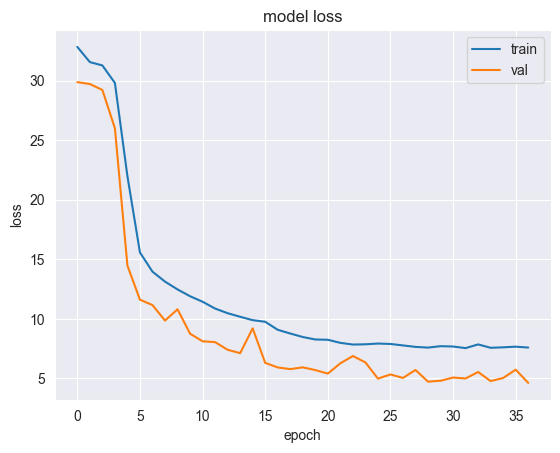

In [299]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [300]:
model.evaluate(test_data, test_label)

294/294 [==============================] - 0s 720us/step - loss: 5.3657 - r2_score: 0.9203


[5.36572265625, 0.9202802777290344]